In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from models import pentzer2022 as pentzer2022
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
# Parameters
abbr = "R10"


In [3]:
preprocess(abbr, verbose=False)
powdf = pentzer2022.pentzer2022(abbr)


R10: 100%|██████████| 1152/1152 [00:00<00:00, 5932.12it/s]


R10 : Exported PENTZER2022POW CSV in data/runs/R10/models/Run10_2021-04-01-11-01-21-SF-pathC_pentzer2022pow.csv


In [4]:
print(powdf.columns.values)


['time' 'time_rel' 'vx' 'vy' 'vz' 'wz' 'current' 'voltage' 'current_cpu'
 'ax' 'ay' 'az' 'theta' 'phi' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL'
 'wR' 'px' 'py' 'pz' 'I_L' 'I_R' 'V_L' 'V_R' 'lat' 'long' 'alt' 'ax_corr'
 'ay_corr' 'az_corr' 'v' 'a' 'vL' 'vR' 'Vmot_L' 'Vmot_R' 'wmot_L' 'wmot_R'
 'Imot_L' 'Imot_R' 'PE_L' 'PE_R' 'Tmot_L' 'Tmot_R' 'TL' 'TR' 'PM_L' 'PM_R'
 'P_logical' 'P_motion' 'PE_motion' 'P_total' 'PE_batt' 'ICRx' 'ICRy'
 'ICRyL' 'ICRyR' 'Bs' 'R' 'time_prop' 'normal_force' 'dx_front' 'dx_rear'
 'dy_left' 'dy_right' 'd_fl' 'd_fr' 'd_rl' 'd_rr' 'dist_asym' 'dist_sym'
 'JS_asym' 'JS_sym' 'JG' 'JB' 'm_sym' 'G_sym' 'B_sym' 'sm_sym' 'sG_sym'
 'sB_sym' 'm_asym' 'G_asym' 'B_asym' 'sm_asym' 'sG_asym' 'sB_asym'
 'Ppredt_sym' 'Perrt_sym' 'EWMAt_sym' 'estt_sym' 'Ppredc_sym' 'Perrc_sym'
 'EWMAc_sym' 'estc_sym' 'Ppredt_asym' 'Perrt_asym' 'EWMAt_asym'
 'estt_asym' 'Ppredc_asym' 'Perrc_asym' 'EWMAc_asym' 'estc_asym'
 'energy_Wh' 'Epredt_sym_Wh' 'Epredt_asym_Wh' 'Epredc_sym_Wh'
 'Epredc_as

In [5]:
model_name = pentzer2022.__MODEL_NAME__.lower()
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename, subdir=model_name)
model_name = pentzer2022.__MODEL_NAME__.title()

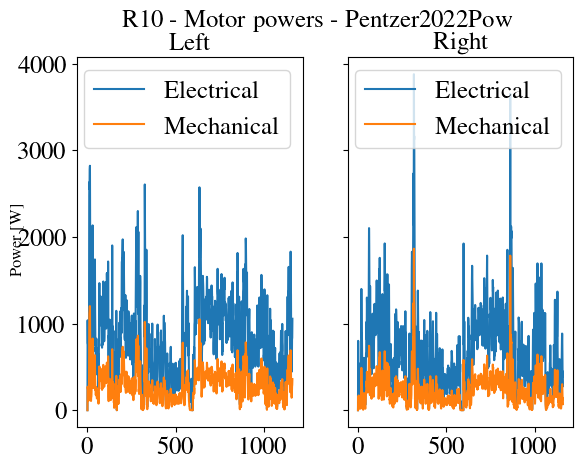

In [6]:
fig, [ax1,ax2] = plt.subplots(ncols=2, sharey=True)
ax1.plot(powdf.time_rel, powdf.PE_L.abs(), label="Electrical")
ax1.plot(powdf.time_rel, powdf.PM_L.abs(), label="Mechanical")
ax2.plot(powdf.time_rel, powdf.PE_R.abs(), label="Electrical")
ax2.plot(powdf.time_rel, powdf.PM_R.abs(), label="Mechanical")
ax1.legend()
ax2.legend()
ax1.set_title("Left")
ax2.set_title("Right")
fig.suptitle(f"{abbr} - Motor powers - {model_name}")
fig.supylabel("Power [W]")
fig.savefig(figdir / f"{abbr}_hmotors.jpg", bbox_inches="tight")

In [7]:
powdf["Ploss_L"] = powdf.PE_L - powdf.PM_L
powdf["Rloss_L"] = powdf.Ploss_L / (powdf.I_L)**2
powdf["Ploss_R"] = powdf.PE_R - powdf.PM_R
powdf["Rloss_R"] = powdf.Ploss_R / (powdf.I_R)**2

powdf["eta_L"] = powdf.PM_L / powdf.PE_L
powdf["eta_R"] = powdf.PM_R / powdf.PE_R

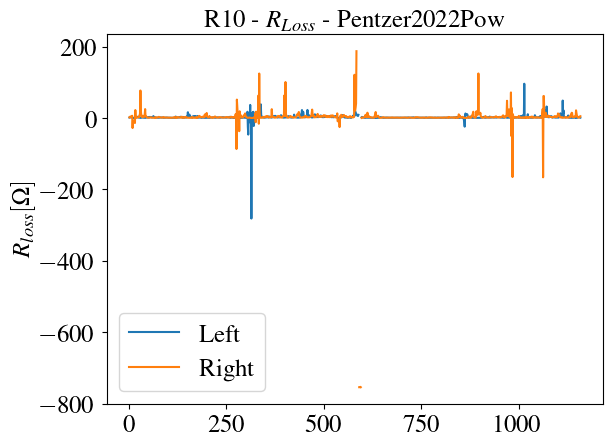

In [8]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.Rloss_L, label="Left")
ax.plot(powdf.time_rel, powdf.Rloss_R, label="Right")
ax.set_ylabel("$R_{loss} [\Omega]$")
ax.legend()
ax.set_title(f"{abbr} - $R_{{Loss}}$ - {model_name}")
fig.savefig(figdir / f"{abbr}_losses.jpg", bbox_inches="tight")

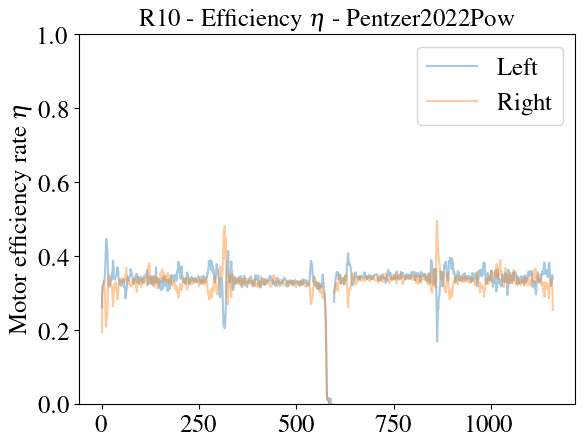

In [9]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.eta_L, label="Left", alpha=0.4)
ax.plot(powdf.time_rel, powdf.eta_R, label="Right", alpha=0.4)
ax.legend()
ax.set_ylabel("Motor efficiency rate $\eta$")
ax.set_title(f"{abbr} - Efficiency $\eta$ - {model_name}")
ax.set_ylim((0,1))
fig.savefig(figdir / f"{abbr}_efficiency.jpg", bbox_inches="tight")

Text(0.5, 0, 'Elapsed time [s]')

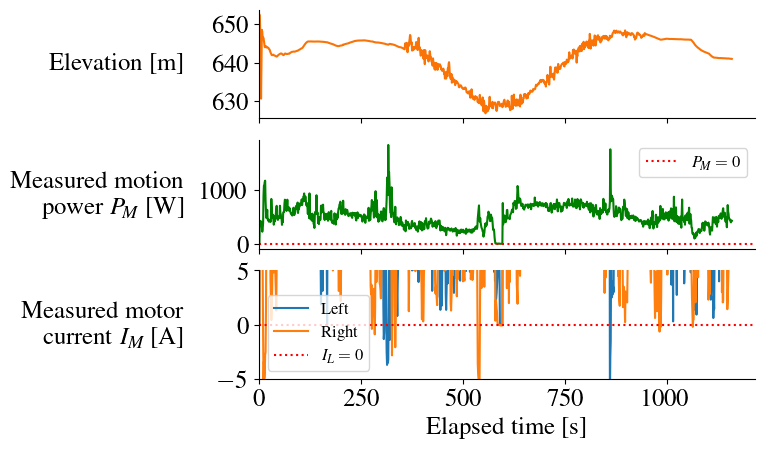

In [10]:
fig, [ax1, ax3, ax4] = plt.subplots(nrows=3, sharex=True)

ax1.plot(powdf.time_rel, powdf.alt, "xkcd:orange")
ax1.set_ylabel("Elevation [m]", rotation=0, ha="right", va="center")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.spines[["right", "top"]].set_visible(False)

# ax2.plot(powdf.time_rel, powdf.m_sym)
# ax2.set_ylabel("$\mu$", rotation=0, ha="right", va="center")
# ax2.yaxis.set_label_coords(-0.15, 0.5)
# ax2.spines[["right", "top"]].set_visible(False)

ax3.plot(powdf.time_rel, powdf.P_motion, "g")
ax3.axhline(y=0, label="$P_M = 0$", linestyle=":", color="r")
ax3.set_ylabel("Measured motion\npower $P_M$ [W]", rotation=0, ha="right", va="center")
ax3.yaxis.set_label_coords(-0.15, 0.5)
ax3.spines[["right", "top"]].set_visible(False)
ax3.legend(fontsize=12)

ax4.plot(powdf.time_rel, powdf.I_L, label="Left")
ax4.plot(powdf.time_rel, powdf.I_R, label="Right")
ax4.axhline(y=0, label="$I_L = 0$", linestyle=":", color="r")
ax4.set_ylabel("Measured motor\ncurrent $I_M$ [A]", rotation=0, ha="right", va="center")
ax4.set_ylim(bottom=-5, top=5)
ax4.yaxis.set_label_coords(-0.15, 0.5)
ax4.spines[["right", "top"]].set_visible(False)
ax4.legend(fontsize=12)

ax1.set_xlim(left=0)

ax4.set_xlabel("Elapsed time [s]")


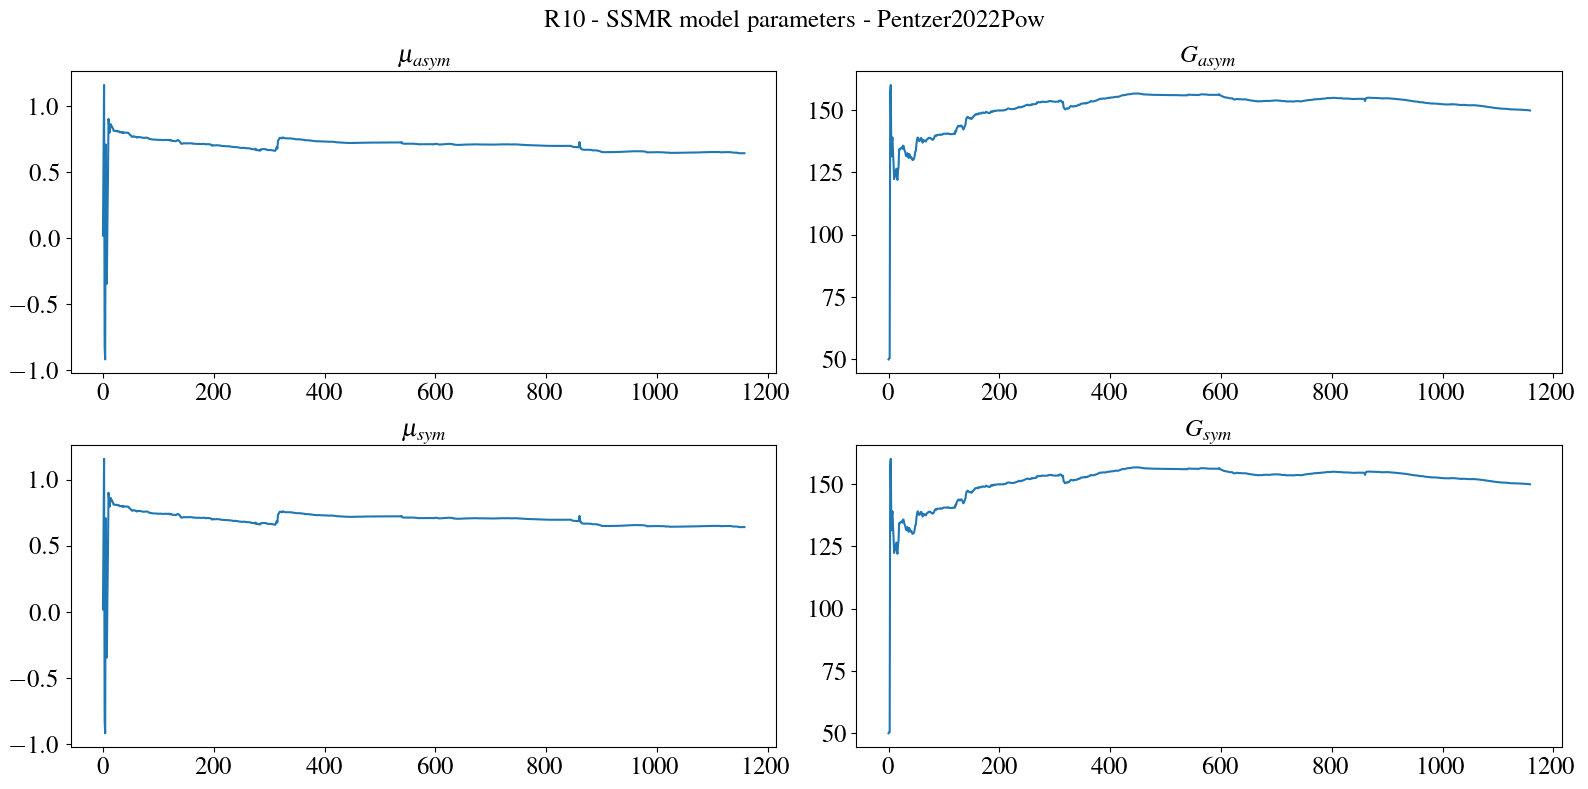

In [11]:
fig, subfigs = plt.subplots(ncols=2, nrows=2, figsize = (16,8))
cols = ("m_asym", "G_asym", "m_sym", "G_sym")

for col, ax in zip(cols, subfigs.reshape(-1)):
    ax.plot(powdf.time_rel, powdf[col])
    if col.startswith("m_"):
        title_txt = f"\{col.replace('m_', 'mu_')}"
    else:
        title_txt = col
    title_txt = title_txt.replace("_asym", "_{{asym}}")
    title_txt = title_txt.replace("_sym", "_{{sym}}")

    # ax.set_xlim(left=50)

    ax.set_title(f"${title_txt}$")

fig.suptitle(f"{abbr} - SSMR model parameters - {model_name}")
fig.tight_layout()
fig.savefig(figdir / f"{abbr}_parameters.jpg", bbox_inches="tight")


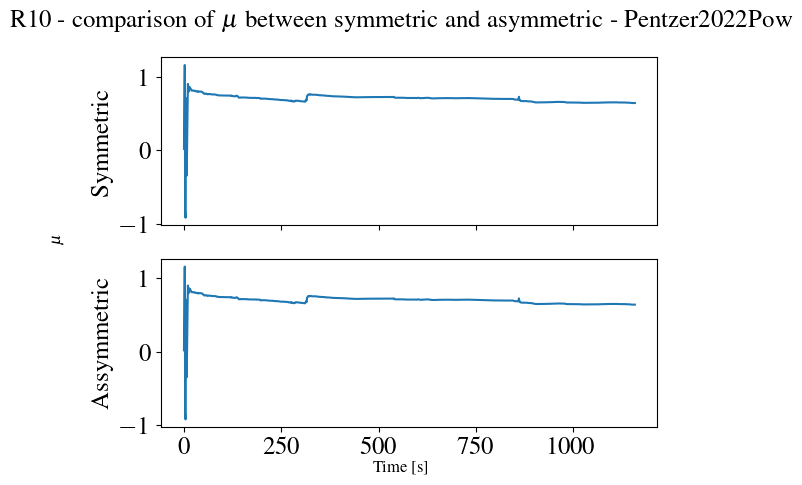

In [12]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
ax1.plot(powdf.time_rel, powdf.m_sym)
ax2.plot(powdf.time_rel, powdf.m_asym)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
fig.supylabel("$\mu$", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $\mu$ between symmetric and asymmetric - {model_name}")

fig.savefig(figdir / f"{abbr}_m.jpg", bbox_inches="tight")

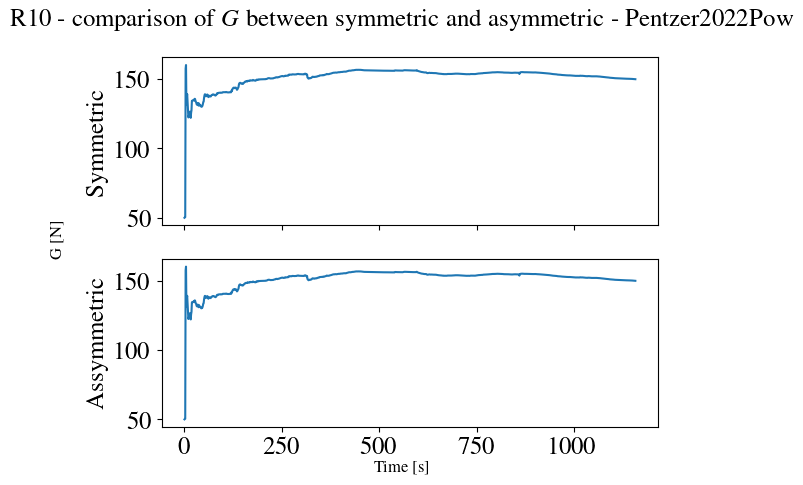

In [13]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
ax1.plot(powdf.time_rel, powdf.G_sym)
ax2.plot(powdf.time_rel, powdf.G_asym)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
fig.supylabel("G [N]", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $G$ between symmetric and asymmetric - {model_name}")

fig.savefig(figdir / f"{abbr}_G.jpg", bbox_inches="tight")

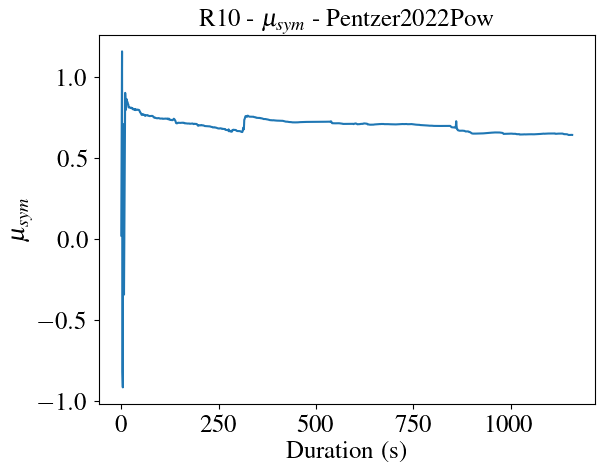

In [14]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.m_sym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{sym}$", x=-0.05)
ax.set_title(f"{abbr} - $\mu_{{sym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_m_sym.jpg", bbox_inches="tight")

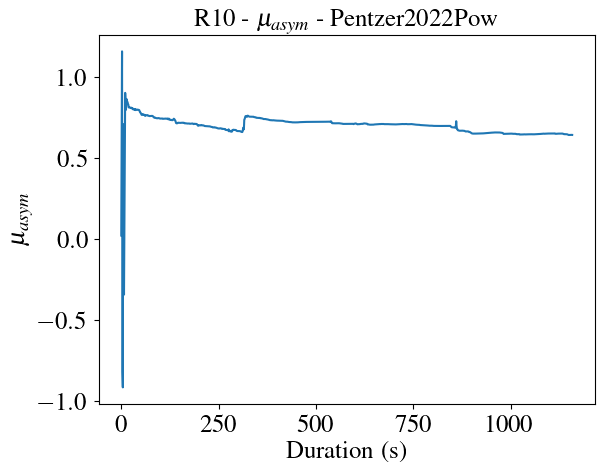

In [15]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.m_asym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{asym}$", x=-0.05)
ax.set_title(f"{abbr} - $\mu_{{asym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_m_asym.jpg", bbox_inches="tight")


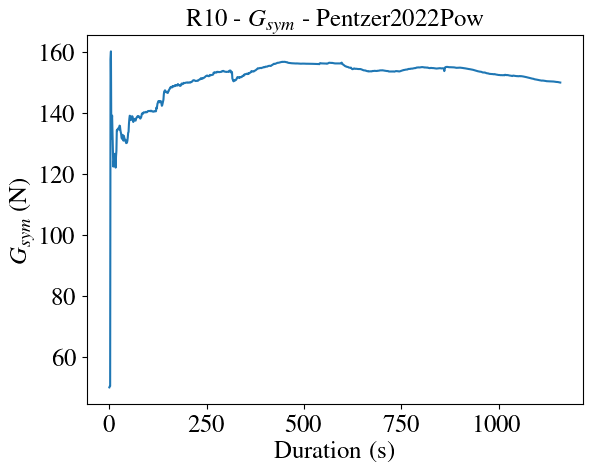

In [16]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.G_sym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$G_{sym}$ (N)", x=-0.05)
ax.set_title(f"{abbr} - $G_{{sym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_G_sym.jpg", bbox_inches="tight")

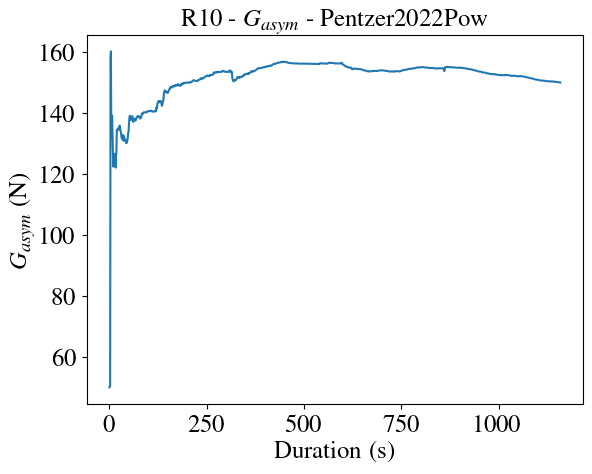

In [17]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.G_asym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$G_{asym}$ (N)", x=-0.05)
ax.set_title(f"{abbr} - $G_{{asym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_G_asym.jpg", bbox_inches="tight")

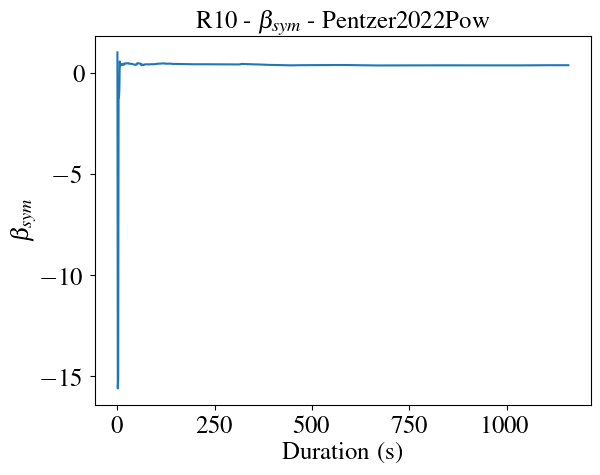

In [18]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.B_sym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\\beta_{sym}$", x=-0.05)
ax.set_title(f"{abbr} - $\\beta_{{sym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_b_sym.jpg", bbox_inches="tight")

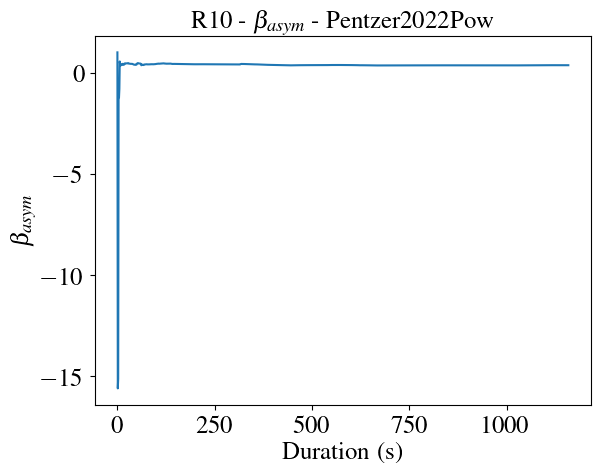

In [19]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.B_asym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\\beta_{asym}$", x=-0.05)
ax.set_title(f"{abbr} - $\\beta_{{asym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_b_asym.jpg", bbox_inches="tight")

# DONE

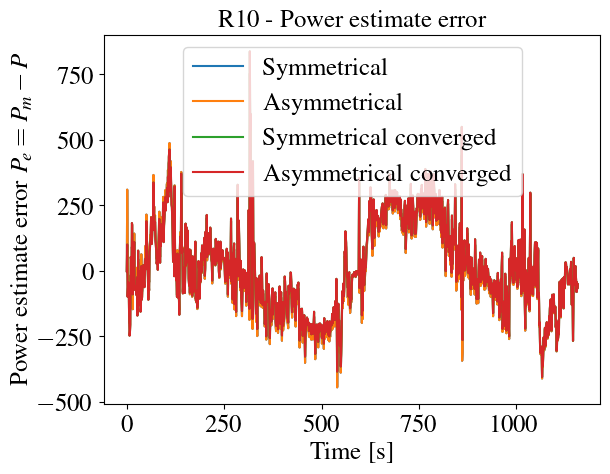

In [20]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.Perrt_sym, label="Symmetrical")
ax.plot(powdf.time_rel, powdf.Perrt_asym, label="Asymmetrical")
ax.plot(powdf.time_rel, powdf.Perrc_sym, label="Symmetrical converged")
ax.plot(powdf.time_rel, powdf.Perrc_asym, label="Asymmetrical converged")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(figdir / f"{abbr}_Perror.jpg", bbox_inches="tight")

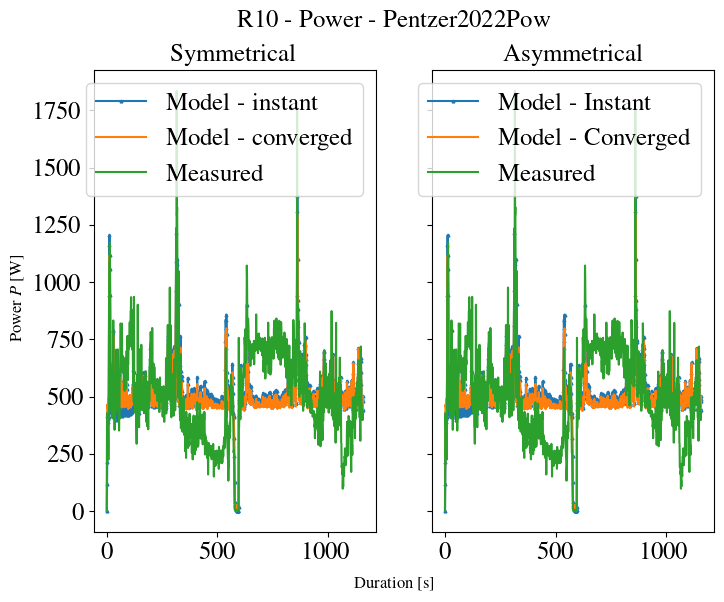

In [21]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(8, 6))
ax1.plot(powdf.time_rel, powdf.Ppredt_sym, label="Model - instant", marker="^", markersize=2)
ax1.plot(powdf.time_rel, powdf.Ppredc_sym, label="Model - converged")
ax1.plot(powdf.time_rel, powdf.P_motion, label="Measured")
ax1.legend()
ax1.set_title("Symmetrical")

ax2.plot(powdf.time_rel, powdf.Ppredt_asym, label="Model - Instant", marker="^", markersize=2)
ax2.plot(powdf.time_rel, powdf.Ppredc_asym, label="Model - Converged")
ax2.plot(powdf.time_rel, powdf.P_motion, label="Measured")
ax2.legend()
ax2.set_title("Asymmetrical")

fig.supylabel("Power $P$ [W]")
fig.supxlabel("Duration [s]")
fig.suptitle(f"{abbr} - Power - {model_name}")
fig.savefig(figdir / f"{abbr}_Power.jpg", bbox_inches="tight")

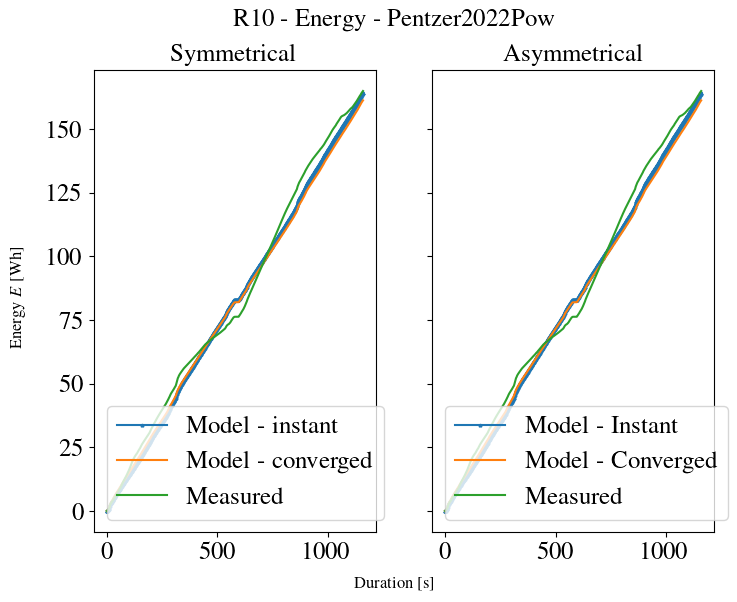

In [22]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(8, 6))
ax1.plot(powdf.time_rel, powdf.Epredt_sym_Wh, label="Model - instant", marker="^", markersize=2)
ax1.plot(powdf.time_rel, powdf.Epredc_sym_Wh, label="Model - converged")
ax1.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax1.legend()
ax1.set_title("Symmetrical")

ax2.plot(powdf.time_rel, powdf.Epredt_asym_Wh, label="Model - Instant", marker="^", markersize=2)
ax2.plot(powdf.time_rel, powdf.Epredc_asym_Wh, label="Model - Converged")
ax2.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax2.legend()
ax2.set_title("Asymmetrical")

fig.supylabel("Energy $E$ [Wh]")
fig.supxlabel("Duration [s]")
fig.suptitle(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh.jpg", bbox_inches="tight")

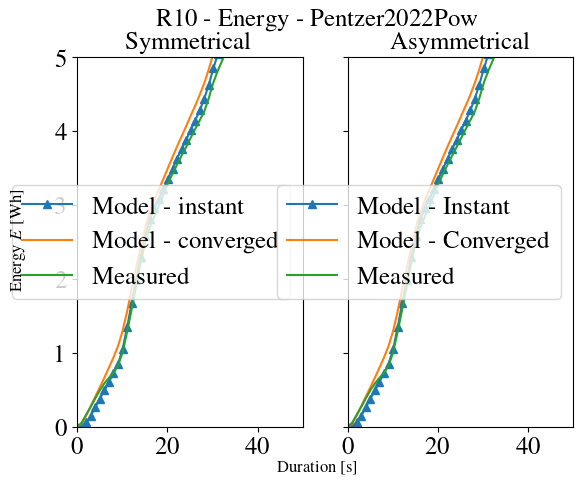

In [23]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True)
ax1.plot(powdf.time_rel, powdf.Epredt_sym_Wh, label="Model - instant",marker="^")
ax1.plot(powdf.time_rel, powdf.Epredc_sym_Wh, label="Model - converged")
ax1.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax1.legend()
ax1.set_title("Symmetrical")

ax2.plot(powdf.time_rel, powdf.Epredt_asym_Wh, label="Model - Instant", marker="^")
ax2.plot(powdf.time_rel, powdf.Epredc_asym_Wh, label="Model - Converged")
ax2.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax2.legend()
ax2.set_title("Asymmetrical")

ax1.set_xlim(left=0, right=50)
ax1.set_ylim(bottom=0, top=5)

fig.supylabel("Energy $E$ [Wh]")
fig.supxlabel("Duration [s]")
fig.suptitle(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh_start.jpg", bbox_inches="tight")

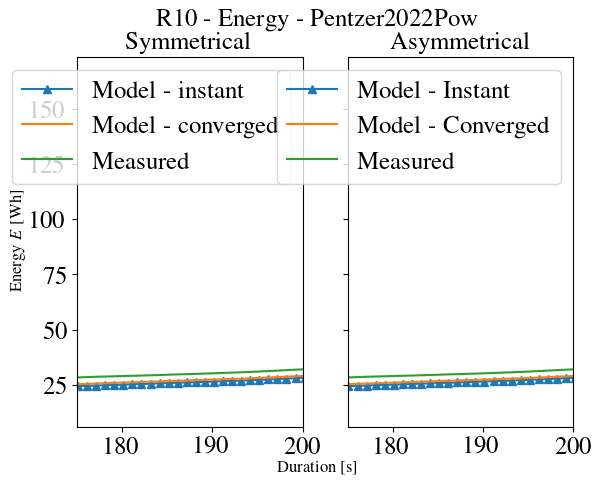

In [24]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True)
ax1.plot(powdf.time_rel, powdf.Epredt_sym_Wh, label="Model - instant",marker="^")
ax1.plot(powdf.time_rel, powdf.Epredc_sym_Wh, label="Model - converged")
ax1.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax1.legend()
ax1.set_title("Symmetrical")

ax2.plot(powdf.time_rel, powdf.Epredt_asym_Wh, label="Model - Instant", marker="^")
ax2.plot(powdf.time_rel, powdf.Epredc_asym_Wh, label="Model - Converged")
ax2.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax2.legend()
ax2.set_title("Asymmetrical")

ax1.set_xlim(left=175, right=200)
ax1.set_ylim(bottom=6)

fig.supylabel("Energy $E$ [Wh]")
fig.supxlabel("Duration [s]")
fig.suptitle(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh_end.jpg", bbox_inches="tight")

## More figs

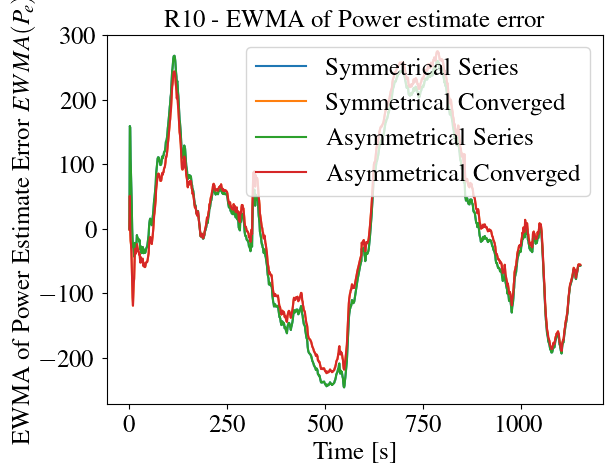

In [25]:
fig, ax = plt.subplots()
powdf.EWMAt_sym.plot(ax=ax, label="Symmetrical Series")
powdf.EWMAc_sym.plot(ax=ax, label="Symmetrical Converged")
powdf.EWMAt_asym.plot(ax=ax, label="Asymmetrical Series")
powdf.EWMAc_asym.plot(ax=ax, label="Asymmetrical Converged")
ax.legend()
ax.set_ylabel("EWMA of Power Estimate Error $EWMA(P_e)$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - EWMA of Power estimate error")
fig.savefig(figdir / f"{abbr}_PEWMA.jpg", bbox_inches="tight")